In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement.date)).all()
print(latest_date)

[('2017-08-23',)]


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# https://docs.python.org/3/library/datetime.html
past_year = dt.date(2017,8,23) - dt.timedelta(days=365)
past_year

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
past_year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date>=past_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_year_prcp = pd.DataFrame(past_year_data, columns=['date','prcp']).set_index('date')
past_year_prcp.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [12]:
# Sort the dataframe by date
past_year_prcp = past_year_prcp.sort_values(by='date')
past_year_prcp

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<Axes: xlabel='Date', ylabel='Inches'>

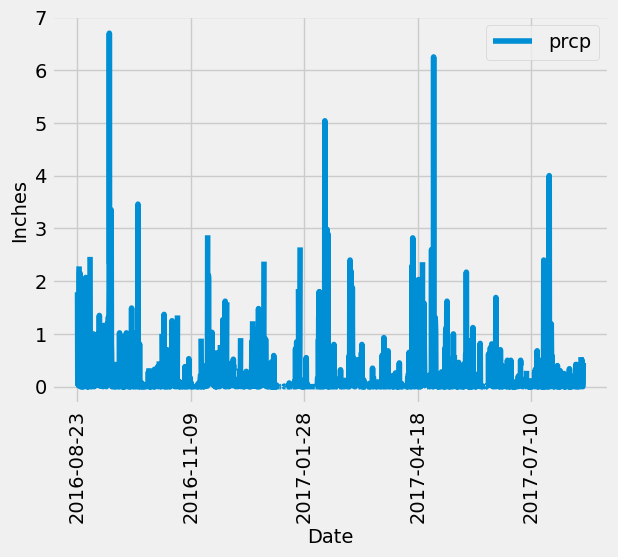

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
past_year_prcp.plot(rot=90, xlabel='Date', ylabel="Inches")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_year_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(station.station)).first()[0]
stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
station_stats

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

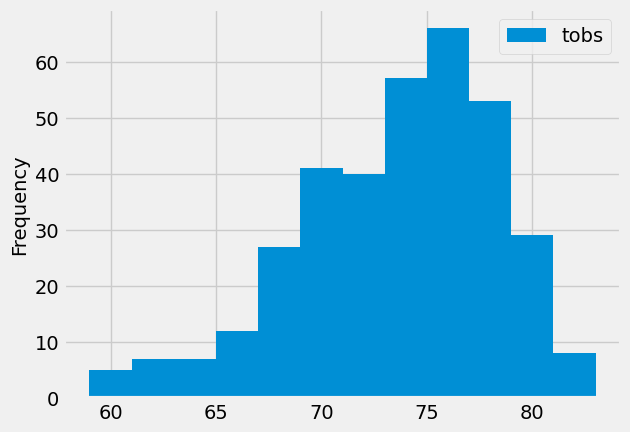

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_past_yr = session.query(measurement.tobs).filter(measurement.station=='USC00519281', measurement.date>=past_year).all()
waihee_df = pd.DataFrame(waihee_past_yr)

waihee_df.plot.hist(bins=12)

# Close Session

In [20]:
# Close Session
session.close()